# Compare cell-based coadds to traditional coadds

A notebook to compare statistics between two types of coadding algorithms, such as average depth.

Last working weekly: w2024_33

Very much still WIP

## Load imports and data

In [1]:
REPO = '/sdf/data/rubin/repo/main/'

from lsst.daf.butler import Butler
from pprint import pprint
import lsst.afw.image as afwImage
from lsst.skymap import Index2D
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy.ma as ma
import healsparse as hsp
import healpy as hp
import lsst.geom as afwGeom
import skyproj

from lsst.sphgeom import Box, HealpixPixelization

# using statsCtrl
from lsst.drp.tasks.assemble_cell_coadd import AssembleCellCoaddTask
import lsst.afw.math as afwMath

%matplotlib inline

butler = Butler(REPO)
registry = butler.registry

# define image display backend
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('firefly')

In [2]:
cell_collection = 'u/mgorsuch/cell_coadds_tract_9813_d_2024_07_29/20240822T182932Z'
traditional_collection = 'u/mgorsuch/trad_coadds_tract_9813_d_2024_07_29/20240822T182652Z'

In [3]:
# create and configure stats control object as seen in assemble_cell_coadd task
statsCtrl = afwMath.StatisticsControl()
statsCtrl.setAndMask(afwImage.Mask.getPlaneBitMask(("BAD", "NO_DATA", "SAT"))) # use default PlaneBitMasks from task
statsCtrl.setNanSafe(True)

In [4]:
patch=50

In [5]:
coadd_cell = butler.get('deepCoaddCell', 
                     collections=cell_collection, 
                     instrument='HSC', 
                     skymap = 'hsc_rings_cells_v1', 
                     tract = 9813, 
                     patch=patch,
                     band='i',)

In [6]:
for datasetType in registry.queryDatasetTypes():
    if registry.queryDatasets(datasetType, collections=traditional_collection).any(execute=False, exact=False):
        print(datasetType)

DatasetType('packages', {}, Packages)
DatasetType('deepCoadd', {band, skymap, tract, patch}, ExposureF)
DatasetType('deepCoadd_directWarp', {band, instrument, skymap, day_obs, physical_filter, tract, patch, visit}, ExposureF)
DatasetType('deepCoadd_nImage', {band, skymap, tract, patch}, ImageU)
DatasetType('makeWarp_metadata', {band, instrument, skymap, day_obs, physical_filter, tract, patch, visit}, PropertySet)
DatasetType('assembleCoadd_metadata', {band, skymap, tract, patch}, PropertySet)
DatasetType('makeWarp_config', {}, Config)
DatasetType('assembleCoadd_config', {}, Config)
DatasetType('makeWarp_log', {band, instrument, skymap, day_obs, physical_filter, tract, patch, visit}, ButlerLogRecords)
DatasetType('assembleCoadd_log', {band, skymap, tract, patch}, ButlerLogRecords)


In [6]:
coadd_trad = butler.get('deepCoadd', 
                     collections=traditional_collection, 
                     instrument='HSC', 
                     skymap = 'hsc_rings_cells_v1', 
                     tract = 9813, 
                     patch=patch,
                     band='i',)

In [7]:
bbox_trad = coadd_trad.image.getBBox()

In [8]:
print(bbox_trad.beginX, bbox_trad.beginY)
print(bbox_trad.endX, bbox_trad.endY)
print(bbox_trad.centerX, bbox_trad.centerY)

17800 11800
21200 15200
19499.5 13499.5


In [9]:
psf = coadd_trad.getPsf()

In [10]:
psf.getAveragePosition()

Point2D(19092.438560185026, 13892.68662666704)

In [11]:
psf_compute = psf.computeImage(psf.getAveragePosition()).array

In [12]:
psf_im = psf.computeKernelImage(psf.getAveragePosition()).array

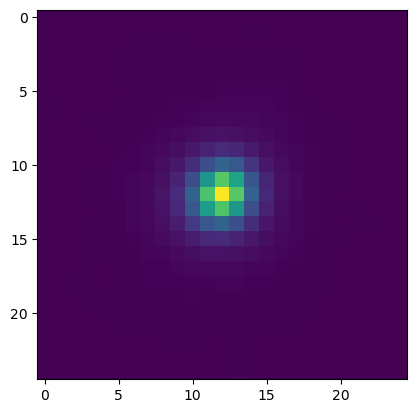

In [30]:
plt.imshow(psf_im)

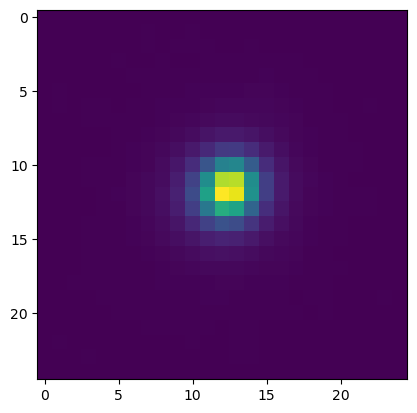

In [44]:
plt.imshow(psf_compute)